In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 60523
catalog = 'CDMS'
mol_str = f'null'
cubes, tbl = fetch_cubes(cubefns, catalog=catalog, mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=104>
   FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l       name      Lab 
   MHz       MHz   MHz nm2         1 / cm          u                                                                                                          
 float64   float64 float64 int64  float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64     str13      bool
---------- ------- ------- ----- --------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ------------- -----
85589.1027  0.0335 -9.7902     3  482.4533    77    60  5231   405    38    28    11     0     0    --    37    31     7     0     0    -- CH3COOH, vt=0 False
85590.4236  0.0023 -8.8339     3   44.8718    25    60  5231   405    12     7     6     0     0    --    11     9     2     0     0    -- CH3COOH, vt=0 False
85629.3189  0.0017 -6.3913

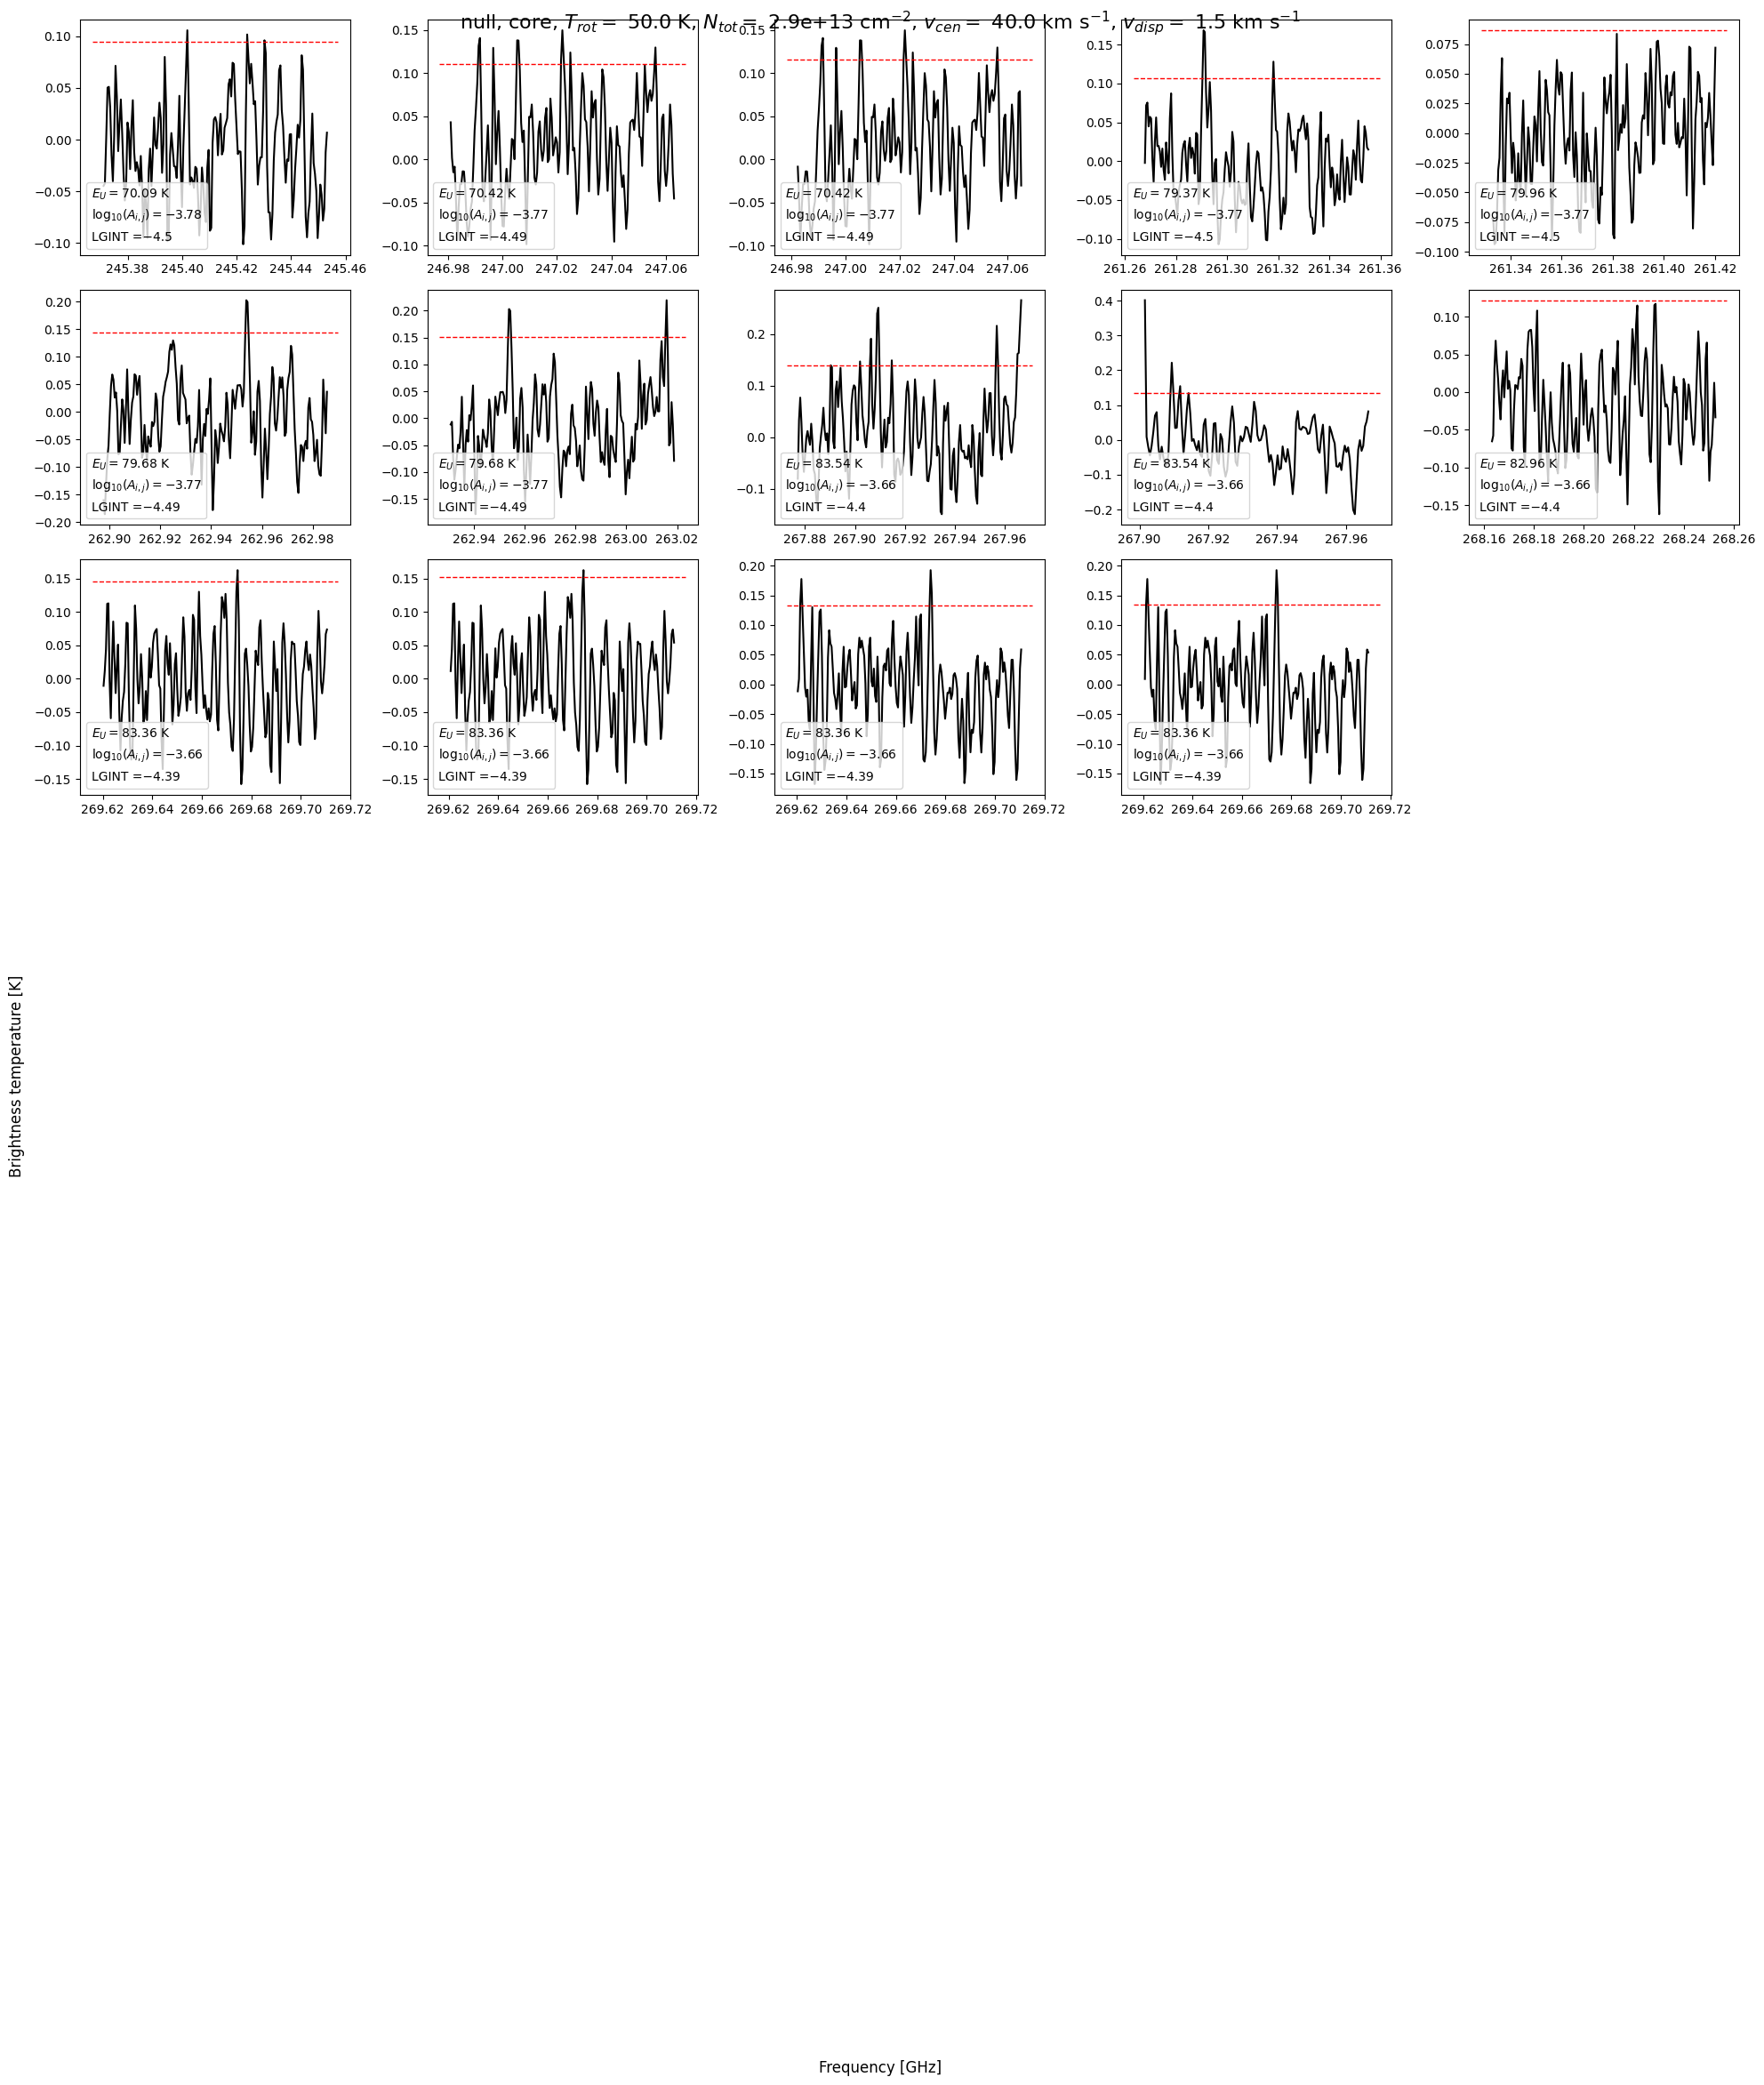

In [7]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 2.9e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=25,
               nrows=8, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str, extr_type="coord", crd=crd,
               show_2_sigma=True, LGINT_cutoff=-4.5)

In [ ]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

In [ ]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 2.0e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog=catalog, fig_width=20, fig_height=25,
                       nrows=8, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=mol_str,
                       extr_type="reg", show_2_sigma=True, return_freqs=True, LGINT_cutoff=-5)

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=mol_str)